<a href="https://colab.research.google.com/github/Jonaslbb/Book_analysis_EDA/blob/main/Notebook/Goodreads_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [252]:
books = pd.read_csv('https://raw.githubusercontent.com/Jonaslbb/Book_analysis_EDA/main/books.csv',error_bad_lines=False,index_col=['bookID'])

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [253]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11123 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               11123 non-null  object 
 1   authors             11123 non-null  object 
 2   average_rating      11123 non-null  float64
 3   isbn                11123 non-null  object 
 4   isbn13              11123 non-null  int64  
 5   language_code       11123 non-null  object 
 6     num_pages         11123 non-null  int64  
 7   ratings_count       11123 non-null  int64  
 8   text_reviews_count  11123 non-null  int64  
 9   publication_date    11123 non-null  object 
 10  publisher           11123 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.0+ MB


In [254]:
books.head()

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
bookID,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In this analysis we're only interested in single books and not collections of books. Therefor we will remove Boxsets etc.

In [255]:
books = books[~books['title'].str.contains('Boxed Set')]
books = books[~books['title'].str.contains('Collection')]
books = books[~books['title'].str.contains('Boxset')]
books = books[~books['title'].str.contains('Box Set')]

Changeing publication_date to datetime dtype and clean 'num_pages' which for some reason loaded with a bunch of spaces. 

In [256]:
books['publication_date'] = pd.to_datetime(books['publication_date'],errors='coerce')
books = books.rename(columns={'  num_pages':'num_pages'})

In [257]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11078 entries, 1 to 45641
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               11078 non-null  object        
 1   authors             11078 non-null  object        
 2   average_rating      11078 non-null  float64       
 3   isbn                11078 non-null  object        
 4   isbn13              11078 non-null  int64         
 5   language_code       11078 non-null  object        
 6   num_pages           11078 non-null  int64         
 7   ratings_count       11078 non-null  int64         
 8   text_reviews_count  11078 non-null  int64         
 9   publication_date    11076 non-null  datetime64[ns]
 10  publisher           11078 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(5)
memory usage: 1.0+ MB


In [258]:
books.title.value_counts()[:10]

The Brothers Karamazov        9
The Iliad                     9
Gulliver's Travels            8
Anna Karenina                 8
The Odyssey                   8
'Salem's Lot                  8
The Picture of Dorian Gray    7
A Midsummer Night's Dream     7
Treasure Island               6
The Histories                 6
Name: title, dtype: int64

In [259]:
books = books.sort_values('ratings_count', ascending=False).drop_duplicates('title').sort_index()

These are the most rated books which i will assume correlates heavily with the amount of people reading them.
Not surprisingly we got Twilight, Harry Potter and Lord Of The Rings at the top, which are all part of the pop culture. We also got classics like The Catcher in the Rye and Animal Farm

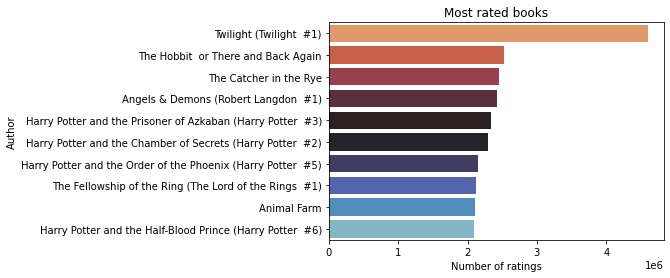

<Figure size 1440x1440 with 0 Axes>

In [260]:
ax = sns.barplot(x=books.sort_values('ratings_count',ascending=False).iloc[:10,7],y=books.sort_values('ratings_count',ascending=False).iloc[:10,0],palette='icefire_r')
ax.set_xlabel('Number of ratings')
ax.set_ylabel('Author')
ax.set_title('Most rated books')
plt.figure(figsize=(20,20))
plt.show()

Reviews and text reviews dosn't correlate perfectly which also exlains why the top 10 most text reviewed books are not the same at the most reviewed overall.

The correlation between the two is 0.85 which is still a pretty strong correlation.

In [261]:
np.corrcoef(books.ratings_count,books.text_reviews_count)

array([[1.        , 0.86586074],
       [0.86586074, 1.        ]])

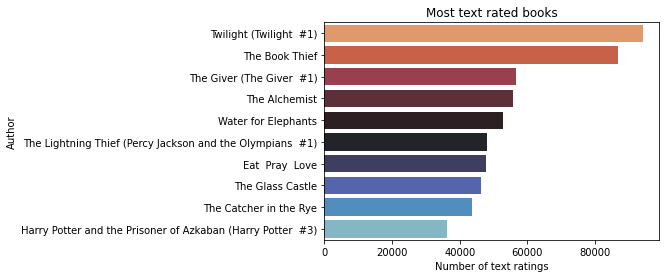

<Figure size 1440x1440 with 0 Axes>

In [262]:
ax = sns.barplot(x=books.sort_values('text_reviews_count',ascending=False).iloc[:10,8],y=books.sort_values('text_reviews_count',ascending=False).iloc[:10,0],palette='icefire_r')
ax.set_xlabel('Number of text ratings')
ax.set_ylabel('Author')
ax.set_title('Most text rated books')
plt.figure(figsize=(20,20))
plt.show()

This analyis is based on a public dataset from kaggle: https://www.kaggle.com/jealousleopard/goodreadsbooks
It contains very few old books since older popular books a published as newer editions. Also it dosn't contain the newset books since the dataset is kinda old.

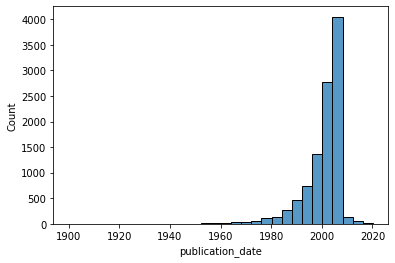

In [263]:
sns.histplot(books['publication_date'],bins=30)

Since there are so few old and new books were are filtering those away, as the sample size to tell anthing general about books from those years.

In [264]:
books['year'] = books['publication_date'].dt.year

In [265]:
filtered = books[(books['year']>1990) & (books['year']<2008)]

The average rating of older books is a bit higher than newer books.

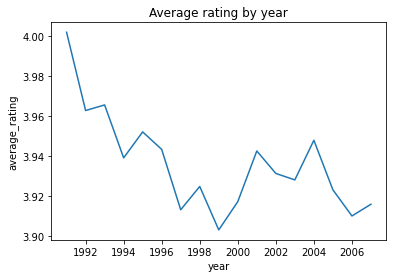

In [266]:
ax = sns.lineplot(x=filtered.groupby('year')['average_rating'].mean().index,y=filtered.groupby('year')['average_rating'].mean())
ax.set_title('Average rating by year')
plt.show()

Average number of pages fluctuate quite a bit, but the general trends seems to be less pages.

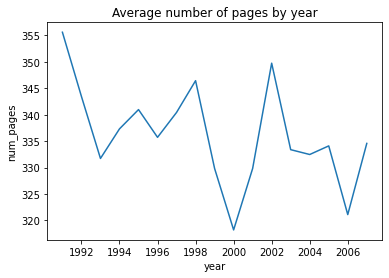

In [267]:
ax = sns.lineplot(x=filtered.groupby('year')['num_pages'].mean().index,y=filtered.groupby('year')['num_pages'].mean())
ax.set_title('Average number of pages by year')
plt.show()

Perhaps not surprising but newer books tend to get more reviews than older. Older books might have been read more than newer, but it wasn't easy to give a public rating at the time of publication.

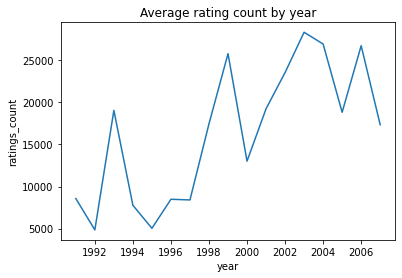

In [268]:
ax = sns.lineplot(x=filtered.groupby('year')['ratings_count'].mean().index,y=filtered.groupby('year')['ratings_count'].mean())
ax.set_title('Average rating count by year')
plt.show()

It's most common for books to be somewhere between 200-400 pages long.
The distribution is right skewed which since some books are way longer than the average, but no books a way shorter, since a book obviously can't be less than 1 page long.  

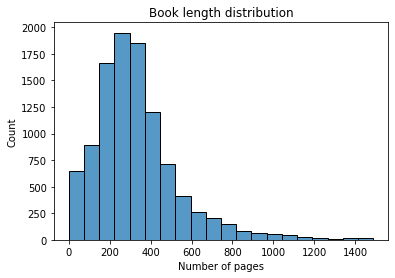

In [269]:
pages = books[books.iloc[:,6]<1500]
ax = sns.histplot(pages.iloc[:,6],bins=20)
ax.set_xlabel('Number of pages')
ax.set_title('Book length distribution')
plt.show()

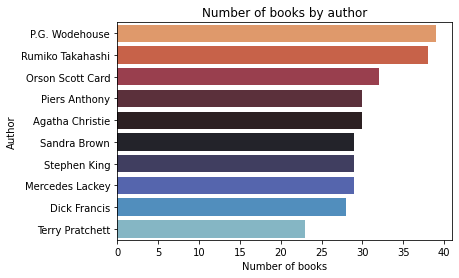

<Figure size 1440x1440 with 0 Axes>

In [270]:
top_authors = pd.DataFrame(books.groupby(by='authors').count().iloc[:,0].sort_values(ascending=False)[:10])
ax = sns.barplot(x=top_authors.title,y=top_authors.index,palette='icefire_r')
ax.set_xlabel('Number of books')
ax.set_ylabel('Author')
ax.set_title('Number of books by author')
plt.figure(figsize=(20,20))
plt.show()

Vintage is the most used publisher, unless you count Penguin Books and Penguin Classics as the same publisher, in which case Penguin becomes the biggest publisher.

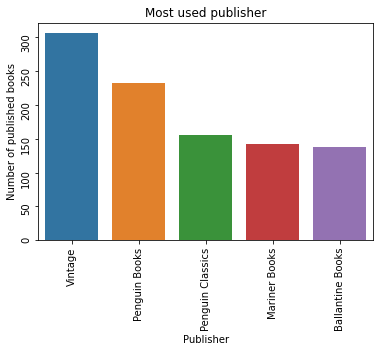

<Figure size 1440x1440 with 0 Axes>

In [271]:
ax = sns.barplot(x=books['publisher'].value_counts().head().index,y=books['publisher'].value_counts().head())
ax.tick_params(labelrotation=90)
ax.set_xlabel('Publisher')
ax.set_ylabel('Number of published books')
ax.set_title('Most used publisher')
plt.figure(figsize=(20,20))
plt.show()

The statistics below shows that we got a lot of books with a relatively low amount of ratings and some heavy outliers which is why the mean is much higher than the median.

In [272]:
print(np.mean(books.ratings_count))
print(np.median(books.ratings_count))
print(np.std(books.ratings_count))
np.quantile(books.ratings_count,0.75)

19251.888295807454
861.5
116737.11594343945


5755.5

For the next part of the analysis i'm only interested in the most popular books, so we remove books below the 0.75 quantile.

In [273]:
books = books[books['ratings_count']>np.quantile(books.ratings_count,0.75)]

Many of the highest rated books are from the same series. Calvin and Hobbes and Fullmetal Alchemist are both represented 4 times in top 10.

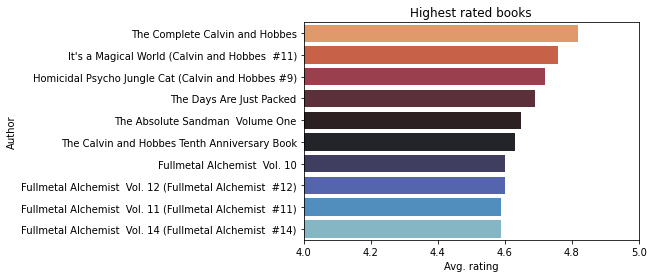

<Figure size 1440x1440 with 0 Axes>

In [274]:
ax = sns.barplot(x=books.sort_values('average_rating',ascending=False).iloc[:10,2],y=books.sort_values('average_rating',ascending=False).iloc[:10,0],palette='icefire_r')
ax.set_xlabel('Avg. rating')
ax.set_ylabel('Author')
ax.set_title('Highest rated books')
ax.set_xlim(4,5)
plt.figure(figsize=(20,20))
plt.show()

Looking at the scatterplot below it's easy to identify big outliers. These big outliers makes it difficult to find patterns in the big cluset of books.

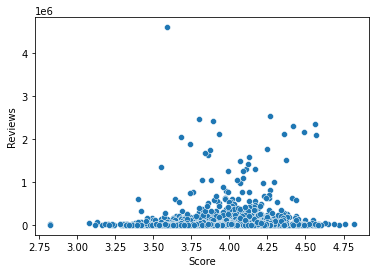

In [275]:
ax = sns.scatterplot(x=books['average_rating'],y=books['ratings_count'])
ax.set_xlabel('Score')
ax.set_ylabel('Reviews')
plt.show()


To make the big cluster easier analyse we remove the biggest outliers.
In the new scatterplot we can clearly see a distribution that looks somewhat like a normal distribution.

In [276]:
no_outliers = books[books['ratings_count']<500000]

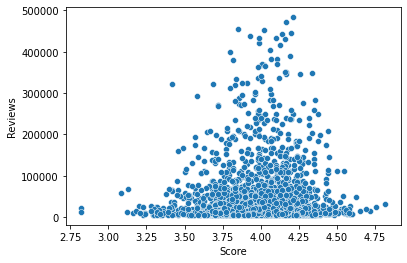

In [277]:
ax = sns.scatterplot(x=no_outliers['average_rating'],y=no_outliers['ratings_count'])
ax.set_xlabel('Score')
ax.set_ylabel('Reviews')
plt.show()

By making a histrogram it's much easier to tell that the average rating is normally distributed

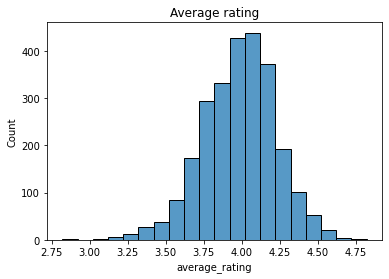

In [278]:
ax = sns.histplot(books['average_rating'],bins=20)
ax.set_title('Average rating')
plt.show()

Lastly we will look for correlations between the numerical values of the dataset.
There is a stong correlation between reviews and text reviews which we also covered earlier.

There is a correalation of 0.12 between average rating and number of pages. Either people are trying to justify their big time commitment by giving better reviews, or people just like longer stories and bigger worlds.

There is almost no correlation between average rating and ratings count, which means that the popular books are not necessarily the best.

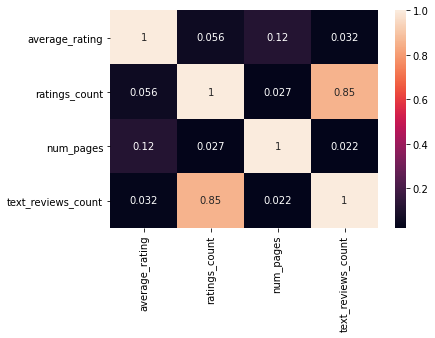

In [279]:
numeric = books[['average_rating','ratings_count','num_pages','text_reviews_count']]
corr = numeric.corr()
sns.heatmap(corr, annot=True)